Aneesha's Notebook

In this notebook, I analyzed the submetric of crime rates in the City of Pittsburgh to measure the "bestness" of neighborhoods. Crime is an important thing to consider when deciding on where to live. Safety is a priority for most individuals, especially considering that more residential areas tend to house families and children. Therefore, knowing the general safety of an area in relation to the frequency of criminal behavior is a necessary metric to explore.

In order to read the dataset, I imported the pandas function. 

In [5]:
import pandas as pd

%matplotlib inline

Now let's read the file.....

In [2]:
data = pd.read_csv("crimerates.csv")
data.head()

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,3,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,4,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,5,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


Since the main columns of interest for our metric are the number of crimes present in each neighborhood, we are going to extract those specific bits of data to better look at the information. The column pertaining to the Neighborhoods is labeled "INCIDENTNEIGHBORDHOOD":

In [8]:
crime_rate = data["INCIDENTNEIGHBORHOOD"].value_counts()
crime_rate

INCIDENTNEIGHBORHOOD
Central Business District    19943
South Side Flats             19098
Carrick                      11927
Shadyside                     8773
Bloomfield                    8704
                             ...  
Ridgemont                      296
Outside County                 256
Troy Hill-Herrs Island         252
Mt. Oliver Neighborhood        117
Mt. Oliver Boro                101
Name: count, Length: 98, dtype: int64

Let's visualize this information better by graphing it:

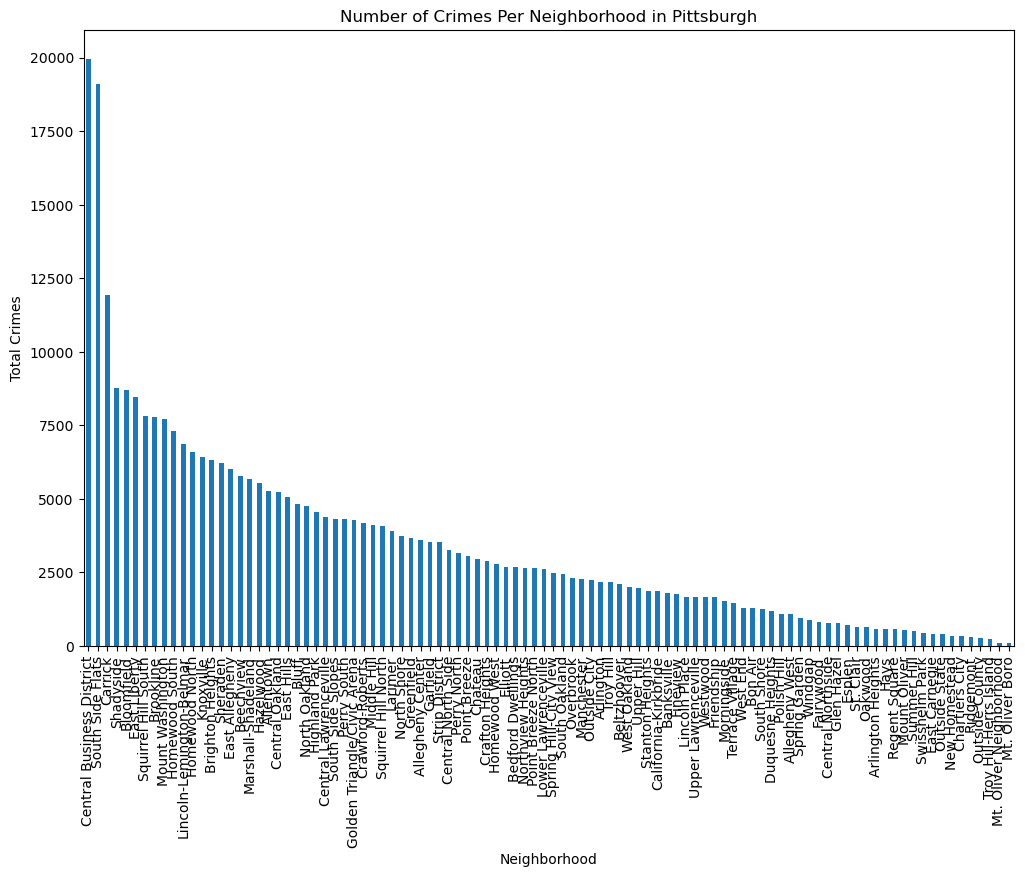

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
crime_rate.plot(kind="bar")

plt.title("Number of Crimes Per Neighborhood in Pittsburgh")
plt.xlabel("Neighborhood")
plt.ylabel("Total Crimes")
plt.show()

This is too much information for us to look at all at once, so I decided to select the top 10 LOWEST neighborhoods, since with this metric, we could classify the "better" characterstic on the neighborhoods with the lowest ratings. 

In [26]:
crime_rates_sorted = crime_rate.sort_values()
lowest_10_rates = crime_rates_sorted.head(10)
lowest_10_rates

INCIDENTNEIGHBORHOOD
Mt. Oliver Boro            101
Mt. Oliver Neighborhood    117
Troy Hill-Herrs Island     252
Outside County             256
Ridgemont                  296
Chartiers City             339
New Homestead              353
East Carnegie              401
Outside State              401
Swisshelm Park             443
Name: count, dtype: int64

I first sorted the data from lowest to highest. Then, I selected the top 10 lowest neighborhoods! Here is a visual representation of the top 10 Neighborhoods with the lowest crimes. 

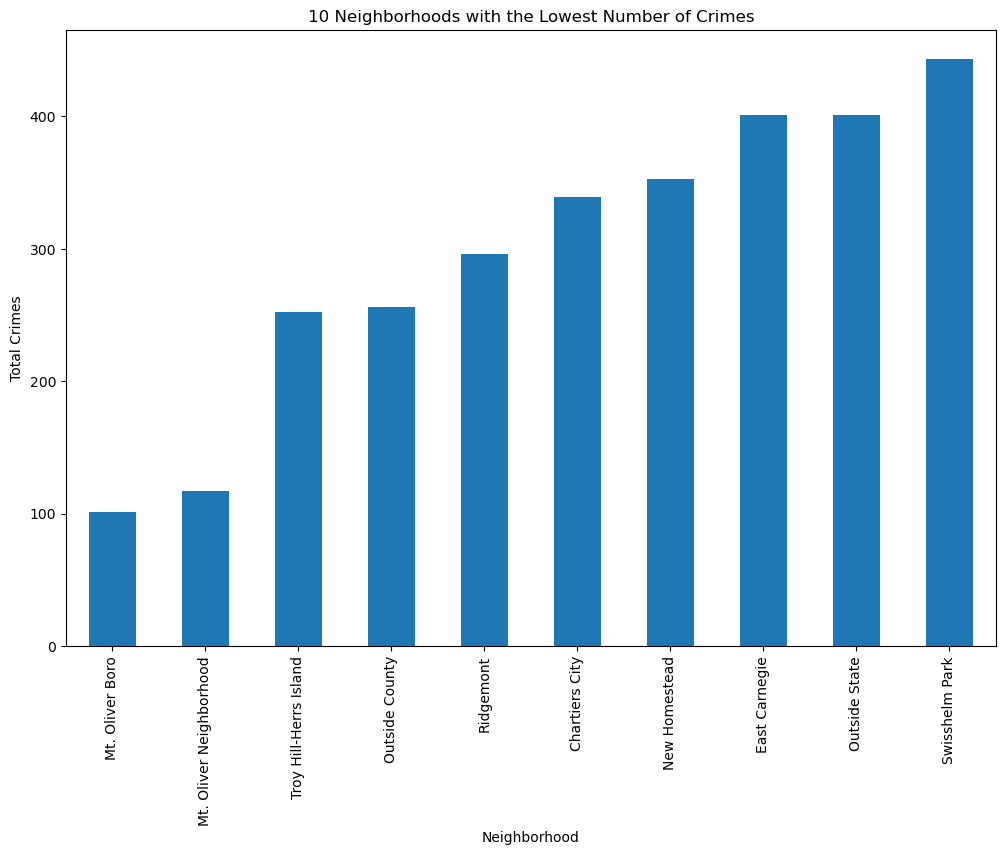

In [28]:
plt.figure(figsize=(12,8))
lowest_10_rates.plot(kind="bar")

plt.title("10 Neighborhoods with the Lowest Number of Crimes")
plt.xlabel("Neighborhood")
plt.ylabel("Total Crimes")
plt.show()

However, within the top 10 are three neighbhorhoods that are not technically "in" Pittsburgh. Mt. Oliver Borough is technically a municipality that is not technically part of Pittsburgh, whereas Mt. Oliver Neighborhood is actually in Pittsburgh. 

Additionally, Outside County and Outside State are not really neighborhoods in Pittsburgh. Because the dataset contains all reports provided by the City of Pittsburgh Police, some of these are reports in areas that are not neccessarily in the jurisdiction within Pittsburgh itself. 

Therefore, I am going to sort the data futher excluding Mt. Oliver Boro, Outside County, Outside State, and anything "UNKNOWN" -- just to be safe!

In [39]:
exclude = ["Mt. Oliver Boro", "Outside County", "Outside State", "UNKNOWN"]
clean = crime_rates_sorted[~crime_rates_sorted.index.isin(exclude)]

lowest10 = clean.sort_values().head(10)
lowest10

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood    117
Troy Hill-Herrs Island     252
Ridgemont                  296
Chartiers City             339
New Homestead              353
East Carnegie              401
Swisshelm Park             443
Summer Hill                523
Mount Oliver               541
Regent Square              565
Name: count, dtype: int64

Now, we can graph this information to show it visually!

<Figure size 1200x800 with 0 Axes>

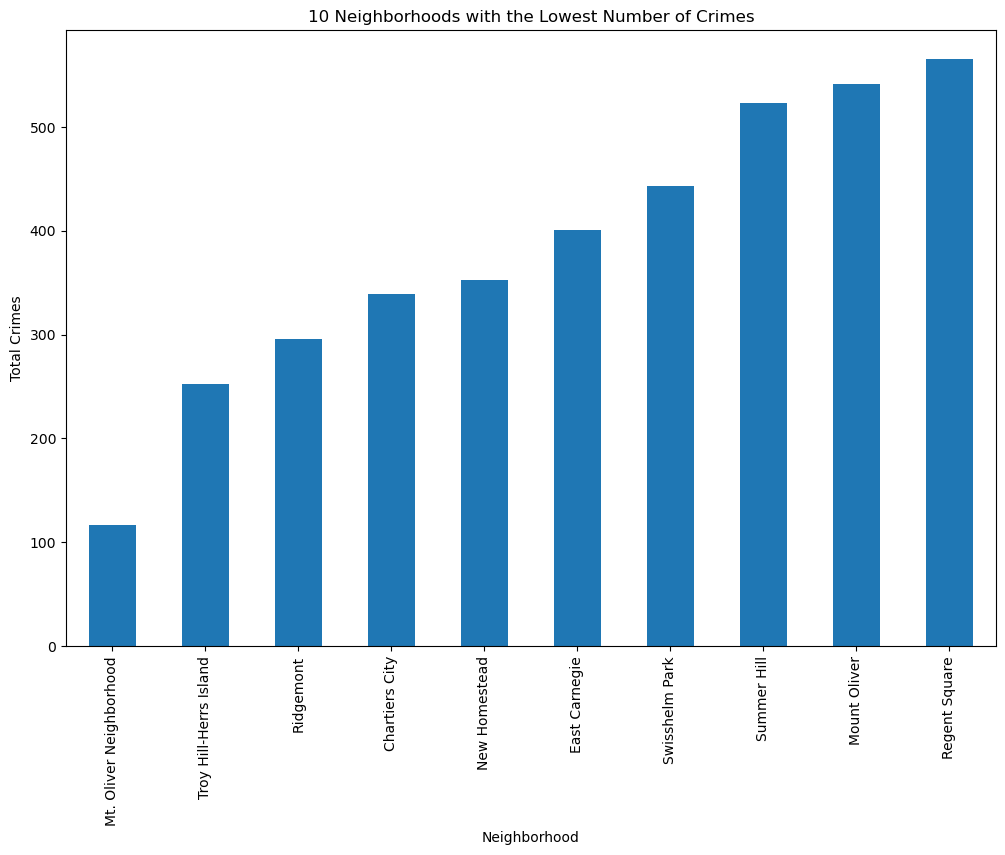

In [42]:
plt.figure(figsize=(12,8))
lowest10.plot(kind="bar")

plt.title("10 Neighborhoods with the Lowest Number of Crimes")
plt.xlabel("Neighborhood")
plt.ylabel("Total Crimes")
plt.show()

From this information, though, we see that there are two separate categories for Mt. Oliver Neighborhood and Mount Oliver, which are the same area. This means that the actual number of crimes for this data is a lot higher than it appears, meaning that our top 10 is likely misconstrued.
Let's merge these two together into one category, "Mount Oliver":

In [43]:
clean.loc["Mount Oliver"] = (clean.get("Mt. Oliver Neighborhood", 0) + clean.get("Mount Oliver", 0))
clean = clean.drop(["Mt. Oliver Neighborhood", "Mount Oliver"], errors="ignore")

clean = clean.sort_values()
lowestsorted10 = clean.sort_values().head(10)
lowestsorted10

INCIDENTNEIGHBORHOOD
Troy Hill-Herrs Island    252
Ridgemont                 296
Chartiers City            339
New Homestead             353
East Carnegie             401
Swisshelm Park            443
Summer Hill               523
Regent Square             565
Hays                      569
Arlington Heights         573
Name: count, dtype: int64

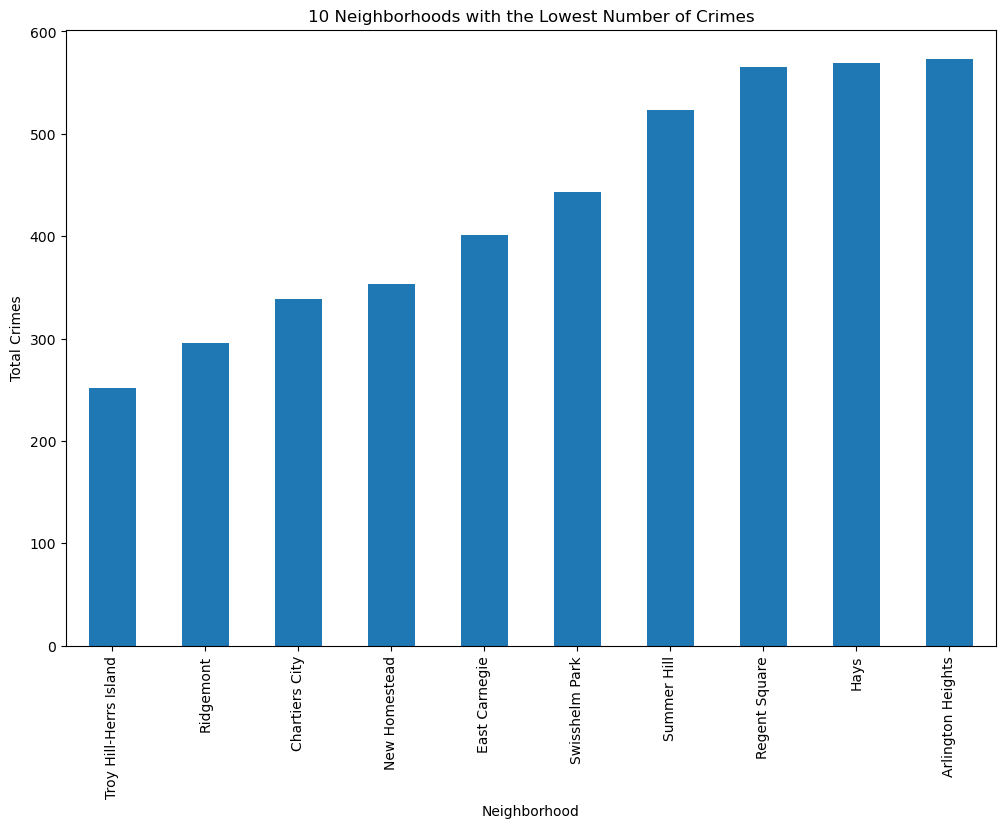

In [44]:
plt.figure(figsize=(12,8))
lowestsorted10.plot(kind="bar")

plt.title("10 Neighborhoods with the Lowest Number of Crimes")
plt.xlabel("Neighborhood")
plt.ylabel("Total Crimes")
plt.show()

Now, we have a solid top 10 neighborhoods with the lowest crime rates, and can safely say that Troy Hill (as well as Herr's Island, which is part of Troy Hill) is the Neighborhood with the lowest crime rate. With this metric in place, we can say that Troy Hill is the "safest" neighborhood in Pittsburgh, and therefore the "best" under this metric!
All in all, analyzing crime rates is a very meaninful indicator to consider in a place's overall livibility. By analyzing the data from WPRDC, we were able to identify which neighborhoods consistently experience lower rates of criminal incidents, suggesting that such areas have better community provisions, local resoruces, and overall safety initiatives. Using pandas and matplotlib to visualize this large dataset helped us to understand the clear differences across the board between different Pittsburgh neighborhoods. Although crime statistics alone do not directly determine the desirability of an area, it does provide insight onto the neighborhood itself and the day-to-day livability within the area. Pittsburgh posseses the unique quality of having a wide range of age and cultural demographics within its population, so it is important to have safe environments that are well suited for growing families, college students, young adults, and the elderly alike. 